# Sentences

First I'm going to load the data, preview it, and create some high level summary statistics

In [1]:
import pickle
with open('restaurant.pickle', 'rb') as handle:
    data = pickle.load(handle)

In [2]:
data

,id,text,aspect_terms,aspect_categories
0,3121,But the staff was so horrible to us.,"[{'term': 'staff', 'polarity': 'negative', 'fr...","[{'category': 'service', 'polarity': 'negative'}]"
1,2777,"To be completely fair, the only redeeming fact...","[{'term': 'food', 'polarity': 'positive', 'fro...","[{'category': 'food', 'polarity': 'positive'},..."
2,1634,"The food is uniformly exceptional, with a very...","[{'term': 'food', 'polarity': 'positive', 'fro...","[{'category': 'food', 'polarity': 'positive'}]"
3,2534,Where Gabriela personaly greets you and recomm...,[],"[{'category': 'service', 'polarity': 'positive'}]"
4,583,"For those that go once and don't enjoy it, all...",[],"[{'category': 'anecdotes/miscellaneous', 'pola..."
...,...,...,...,...
3039,1063,But that is highly forgivable.,[],"[{'category': 'anecdotes/miscellaneous', 'pola..."
3040,777,"From the appetizers we ate, the dim sum and ot...","[{'term': 'appetizers', 'polarity': 'positive'...","[{'category': 'food', 'polarity': 'positive'}]"
3041,875,"When we arrived at 6:00 PM, the restaurant was...",[],"[{'category': 'anecdotes/miscellaneous', 'pola..."
3042,671,Each table has a pot of boiling water sunken i...,"[{'term': 'table', 'polarity': 'neutral', 'fro...","[{'category': 'food', 'polarity': 'neutral'}]"


In [16]:
import numpy as np
sentence_lengths = [len(x) for x in data.text]
print(f"The data contains {len(data)} sentences in total, with lengths ranging from {np.min(sentence_lengths)} to {np.max(sentence_lengths)} characters.")

The data contains 3044 sentences in total, with lengths ranging from 5 to 357 characters.


## Word cloud

A quick way of representing the most common words is to visualise them in a word cloud.

In [70]:
from wordcloud import WordCloud

In [75]:
one_big_string = " ".join(data.text)

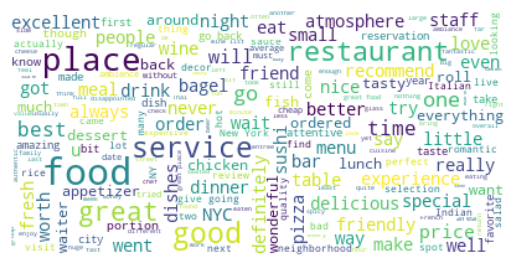

In [82]:
import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size=30, background_color="white").generate(one_big_string)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Bigrams and trigrams

Another quick way to explore the data is to explore the most common bigrams and trigrams (two and three word phrases)

In [113]:
import nltk
from nltk import ngrams
from nltk.corpus import stopwords

In [107]:
tokenized = nltk.word_tokenize(one_big_string)

In [123]:
tokenized = [x for x in tokenized if x.lower() not in stopwords.words('english') + [".", ",", "!"]]

In [124]:
bigram=list(ngrams(tokenized,2))
Counter(bigram).most_common(10)

[(('ca', "n't"), 36),
 (('go', 'back'), 33),
 (('great', 'food'), 25),
 (('New', 'York'), 23),
 (('great', 'place'), 20),
 (('food', 'good'), 20),
 (('food', 'great'), 19),
 (('wine', 'list'), 18),
 (('highly', 'recommend'), 15),
 (('one', 'best'), 14)]

In [125]:
trigram=list(ngrams(tokenized,3))
Counter(trigram).most_common(10)

[(('would', 'highly', 'recommend'), 7),
 (('definitely', 'go', 'back'), 7),
 (('ca', "n't", 'wait'), 6),
 (('ca', "n't", 'beat'), 5),
 (('highly', 'recommend', 'place'), 5),
 (('upper', 'east', 'side'), 4),
 (('food', 'great', 'service'), 4),
 (('New', 'York', 'City'), 4),
 (('service', 'great', 'food'), 4),
 (('make', 'feel', 'like'), 4)]

# Aspect Terms

What are our most common aspect terms?

In [30]:
def get_terms(row):
    return [x['term'] for x in row.aspect_terms]

In [31]:
aspect_terms = data.apply(get_terms, axis = 1)

In [36]:
aspect_terms = [x for y in aspect_terms for x in y]

In [39]:
from collections import Counter
Counter(aspect_terms).most_common(10)

[('food', 358),
 ('service', 206),
 ('place', 64),
 ('prices', 60),
 ('menu', 58),
 ('staff', 56),
 ('dinner', 55),
 ('atmosphere', 49),
 ('pizza', 43),
 ('table', 41)]

We can see that this maps to prominent terms in our word cloud above.

How long are each of these terms?  What's our longest term?

In [43]:
print(f" The longest term is: {np.max([len(x) for x in aspect_terms])} characters")

 The longest term is: 115 characters


In [42]:
[x for x in aspect_terms if len(x) == 115]

['Godmother pizza (a sort of traditional flat pizza with an olive oil-brushed crust and less tomato sauce than usual)']

# Aspect Sentiment

What is the distribution of the different aspect sentiment assignments?

In [44]:
def get_sentiment(row):
    return [x['polarity'] for x in row.aspect_terms]

aspect_sentiment = data.apply(get_sentiment, axis = 1)

In [47]:
sentiments = [x for y in aspect_sentiment for x in y]
sentiments = Counter(sentiments)

In [48]:
sentiments

Counter({'negative': 807, 'positive': 2164, 'neutral': 637, 'conflict': 91})

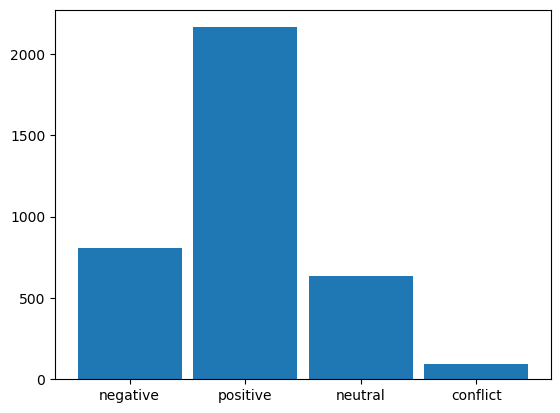

In [58]:
import numpy as np
import matplotlib.pyplot as plt


labels, values = zip(*sentiments.items())

indexes = np.arange(len(labels))
width = 0.9

plt.bar(indexes, values, width)
plt.xticks(indexes, labels)
plt.show()

Our dataset has mainly positive sentiments, with fewer negative, neutral, or conflicted.  We should keep this in mind when fitting models to the data as the unbalanced classes might lead to us fitting a model that performs well on some categories but not others.

# Aspect Categories

What is the distribution of aspect categories?

In [60]:
def get_category(row):
    return [x['category'] for x in row.aspect_categories]

aspect_categories = data.apply(get_category, axis = 1)

In [61]:
aspect_categories = [x for y in aspect_categories for x in y]
aspect_categories = Counter(aspect_categories)

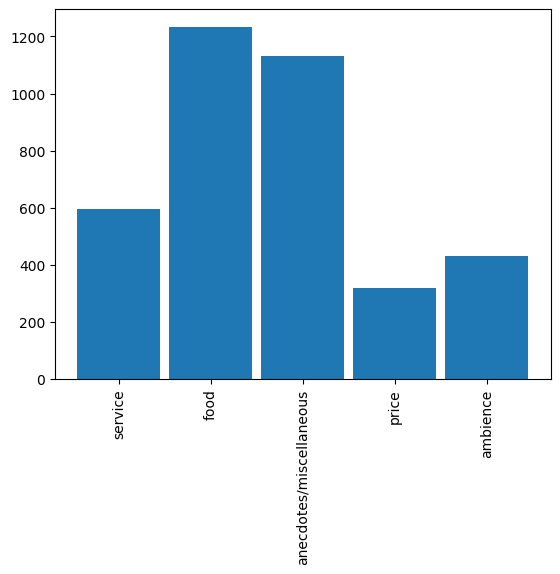

In [64]:
import numpy as np
import matplotlib.pyplot as plt


labels, values = zip(*aspect_categories.items())

indexes = np.arange(len(labels))
width = 0.9

plt.bar(indexes, values, width)
plt.xticks(indexes, labels)
plt.xticks(rotation=90)
plt.show()

Most sentences comment on food - as one might expect - but many sentences contain anecdotes and miscellaneous comments.  Therefore, we should consider this in any modelling as we may wish to exclude these as irrelevant and so need to be able to identify them readily.

# Aspect Polarity

We've looked at sentiment at the sentence level - how does it look at the aspect level?

In [66]:
def get_cat_sentiment(row):
    return [x['polarity'] for x in row.aspect_categories]

aspect_cat_sentiment = data.apply(get_cat_sentiment, axis = 1)

aspect_cat_sentiment = [x for y in aspect_cat_sentiment for x in y]
aspect_cat_sentiment = Counter(aspect_cat_sentiment)

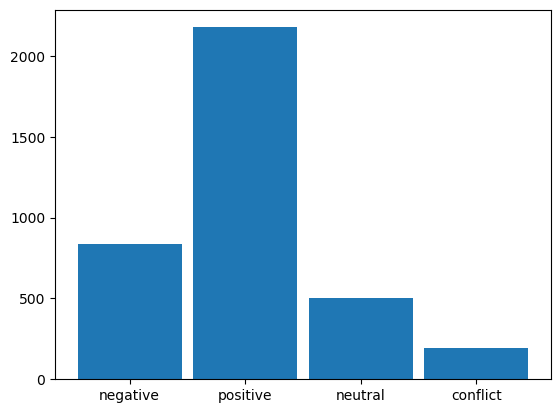

In [68]:
import numpy as np
import matplotlib.pyplot as plt

labels, values = zip(*aspect_cat_sentiment.items())

indexes = np.arange(len(labels))
width = 0.9

plt.bar(indexes, values, width)
plt.xticks(indexes, labels)
plt.show()

The plot above shows a similar distribution of sentiments; again, we should take this into account so we don't end up favouring models that happen to predict positive sentiment.